## **Tarefa 2: MO433 - Aprendizado não supervisionado**

## **Equipe:**

* Elian Laura  | 265685
* Iury Cleveston  | 230216

In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm

# Read the dataset
X = pd.read_csv("ex2-data.csv", header=None, sep='\s+').values

## 1) k-means

In [2]:
def plot_silhouette(ax, k, silhouette_average, silhouette_samples, cluster_predicted):
    
    # Define the plot settings
    ax1.set_xlim([0, 1])
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    y_lower = 10
    
    # For each cluster, plot the silhouette
    for i in range(k):

        # Build the silhouette
        ith_cluster_silhouette = silhouette_samples[cluster_predicted == i]
        ith_cluster_silhouette.sort()
        y_upper = y_lower + ith_cluster_silhouette.shape[0]

        color = cm.nipy_spectral(float(i) / r)
        
        # Plot silhouette
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * ith_cluster_silhouette.shape[0], str(i))

        y_lower = y_upper + 10

    # Set plot labels
    ax.set_title("Cluster Silhouette")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Clusteres")

    # Plot the average silhouette value
    ax.axvline(x=silhouette_average, color="red", linestyle="--")

In [3]:
def plot_cluster(ax, X, centers, colors, dim=(0,1)):
        
    # Plot the cluster data dimention
    ax.scatter(X[:, dim[0]], X[:, dim[1]], marker=".", s=40, lw=0, alpha=0.8, c=colors, edgecolor="k")
    
    # Plot the cluster center
    ax.scatter(centers[:, dim[0]], centers[:, dim[1]], marker="o", c="white", alpha=1, s=300, edgecolor="k")

    # Numerate the cluster's center
    for i, c in enumerate(centers):
        ax.scatter(c[dim[0]], c[dim[1]], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    # Set plot labels
    ax.set_title("Data Clustered")
    ax.set_xlabel("1st Feature")
    ax.set_ylabel("2nd Feature")

n_clusters: 2, average_silhouette_score: 0.15241245372708154
n_clusters: 3, average_silhouette_score: 0.1645535812866017
n_clusters: 4, average_silhouette_score: 0.17238964624978043
n_clusters: 5, average_silhouette_score: 0.18221285383501304
n_clusters: 6, average_silhouette_score: 0.20355879758478096
n_clusters: 7, average_silhouette_score: 0.2202875089001032
n_clusters: 8, average_silhouette_score: 0.23903440848681726
n_clusters: 9, average_silhouette_score: 0.2502355677831853
n_clusters: 10, average_silhouette_score: 0.2515685764048138
n_clusters: 11, average_silhouette_score: 0.24155431724960277
n_clusters: 12, average_silhouette_score: 0.23826629888276574
n_clusters: 13, average_silhouette_score: 0.24413268300769847
n_clusters: 14, average_silhouette_score: 0.23897582263101308
n_clusters: 15, average_silhouette_score: 0.25179660436812984


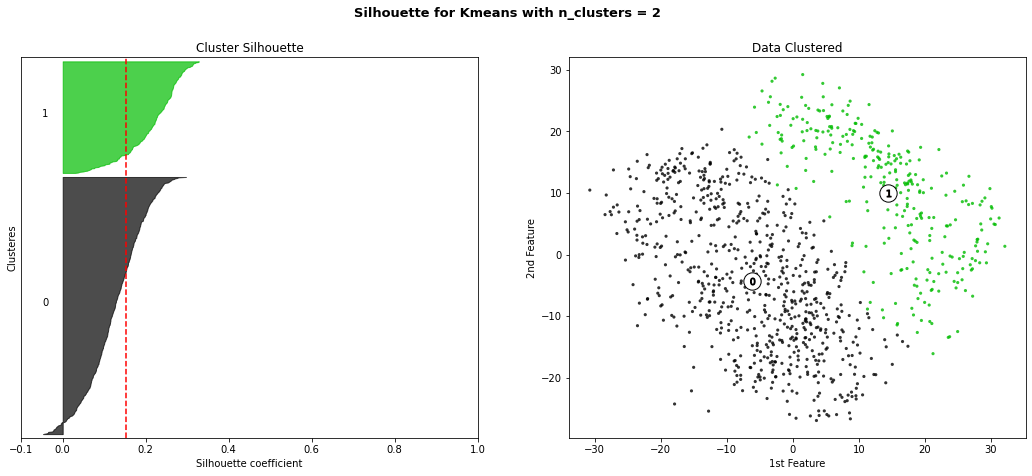

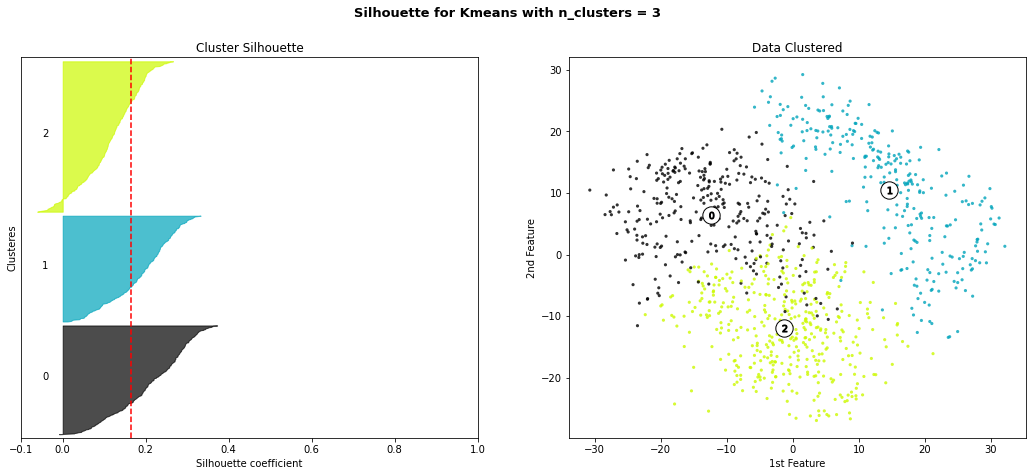

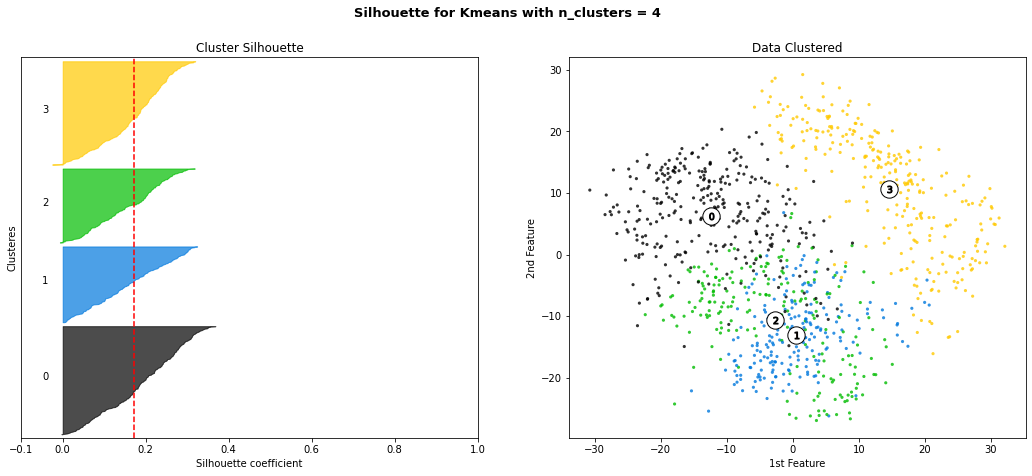

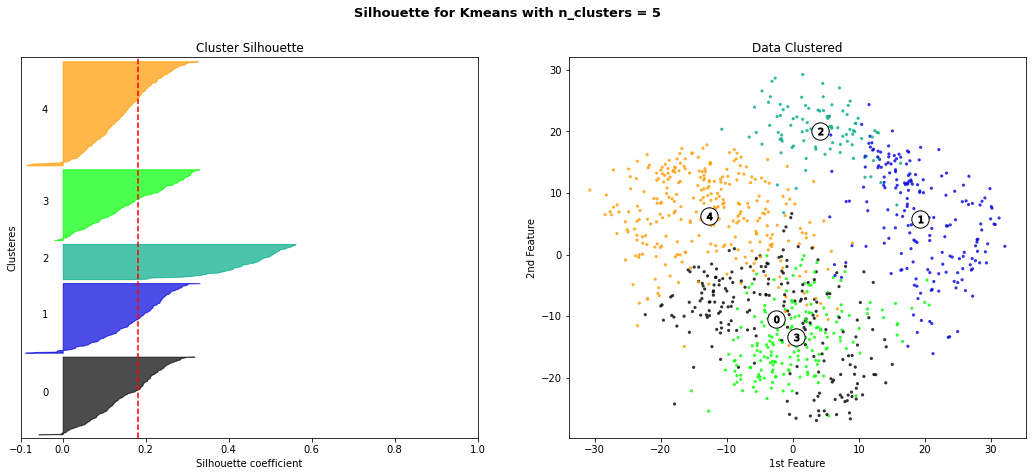

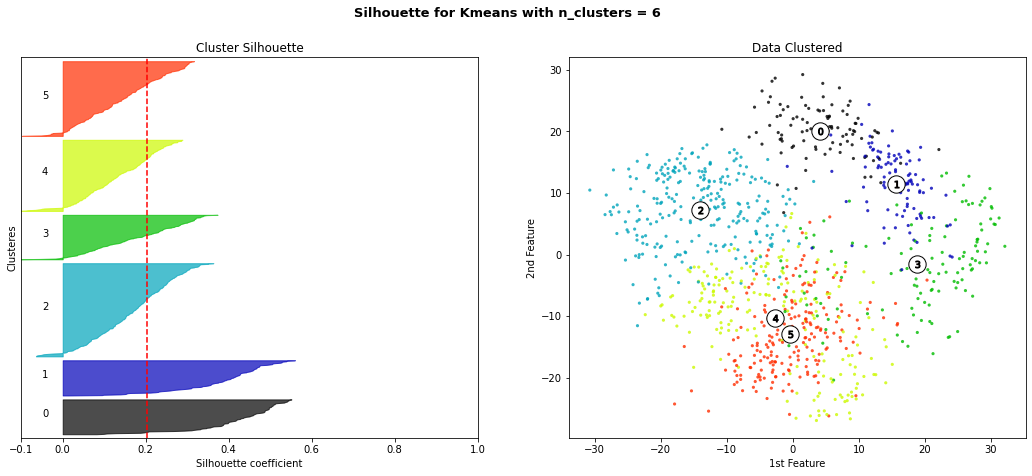

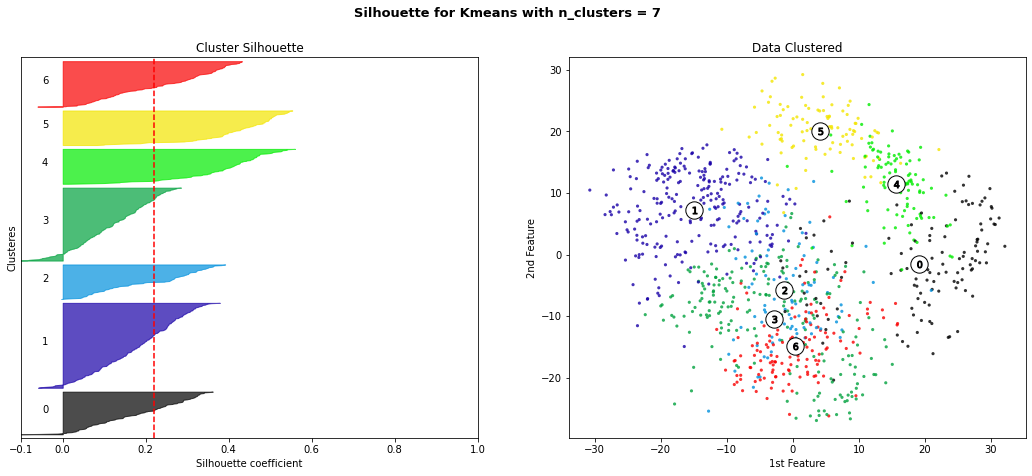

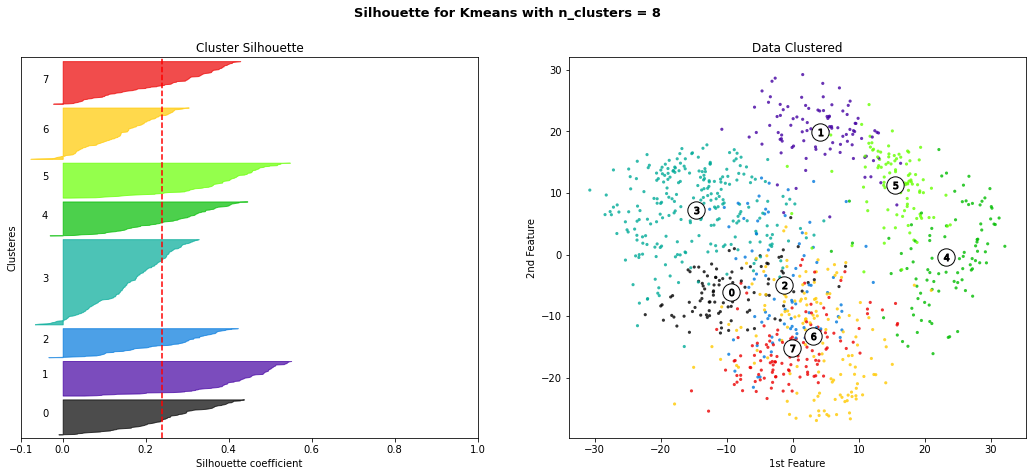

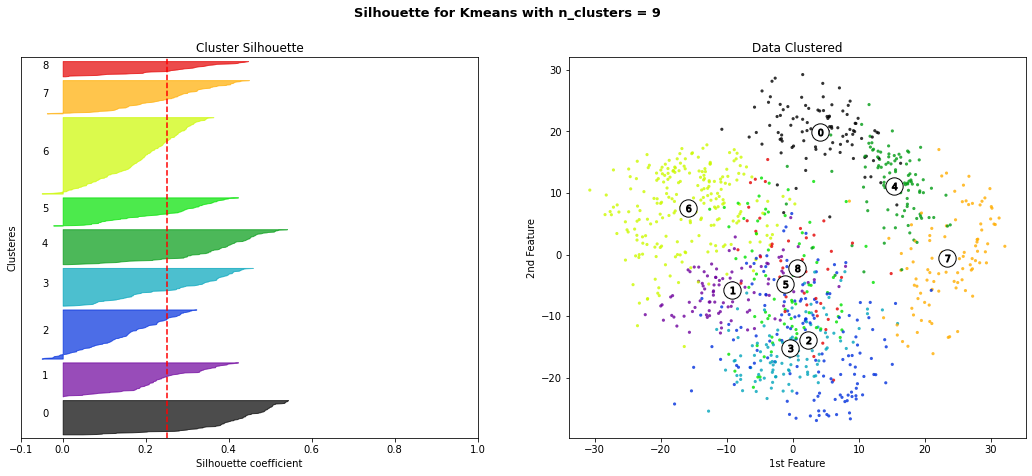

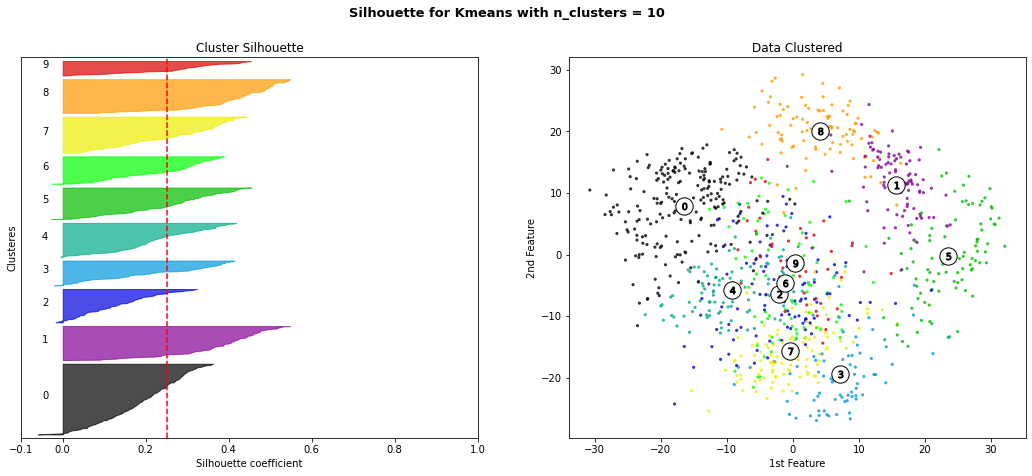

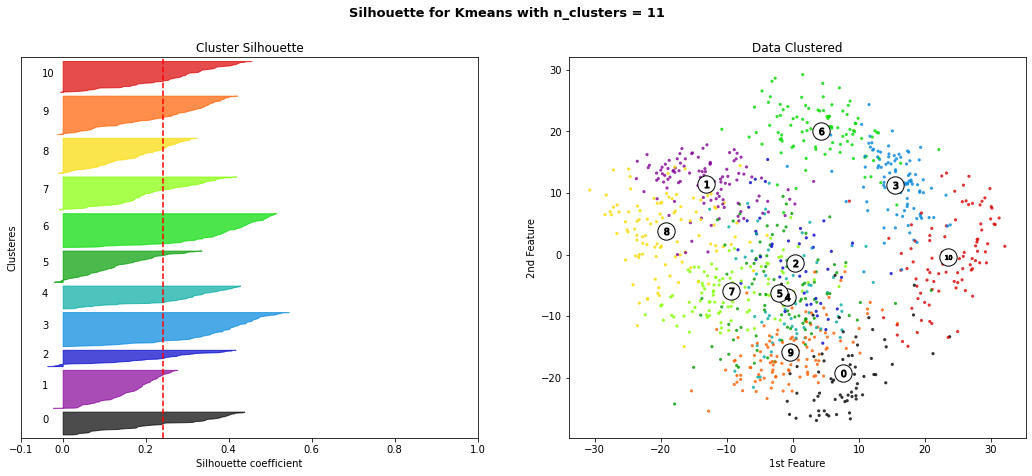

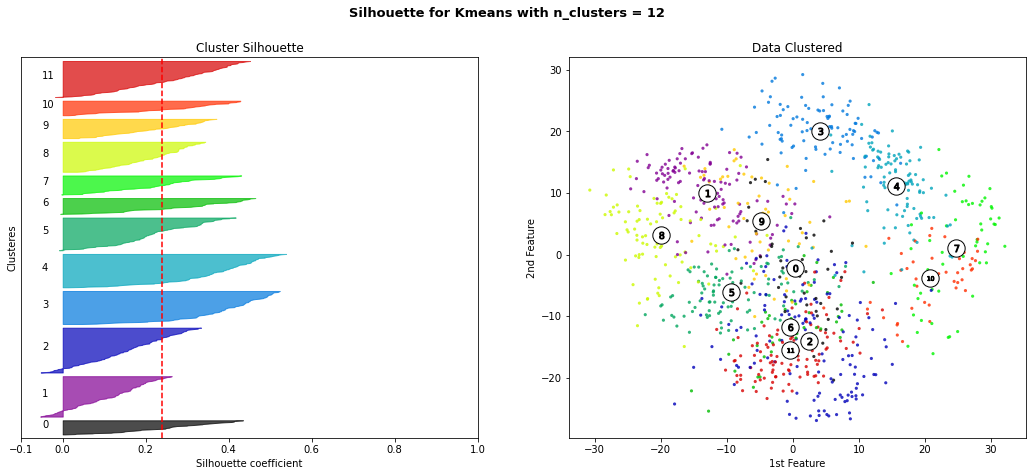

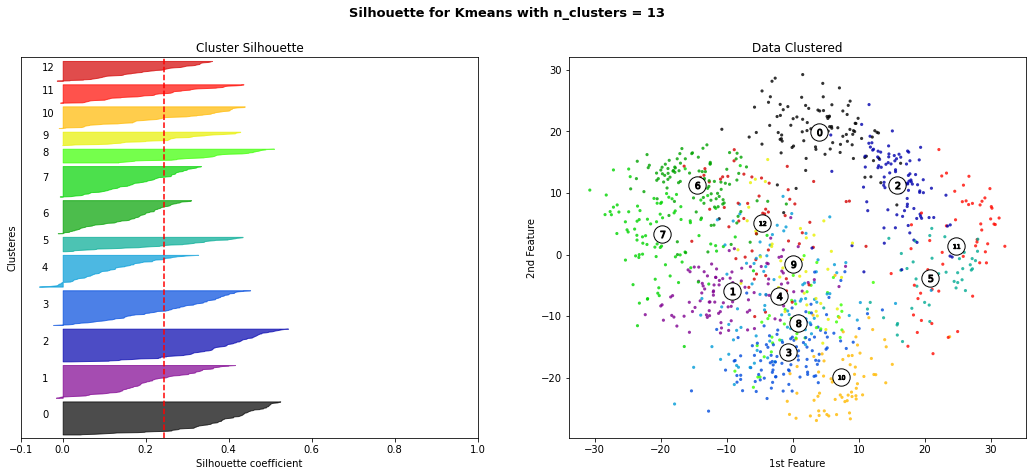

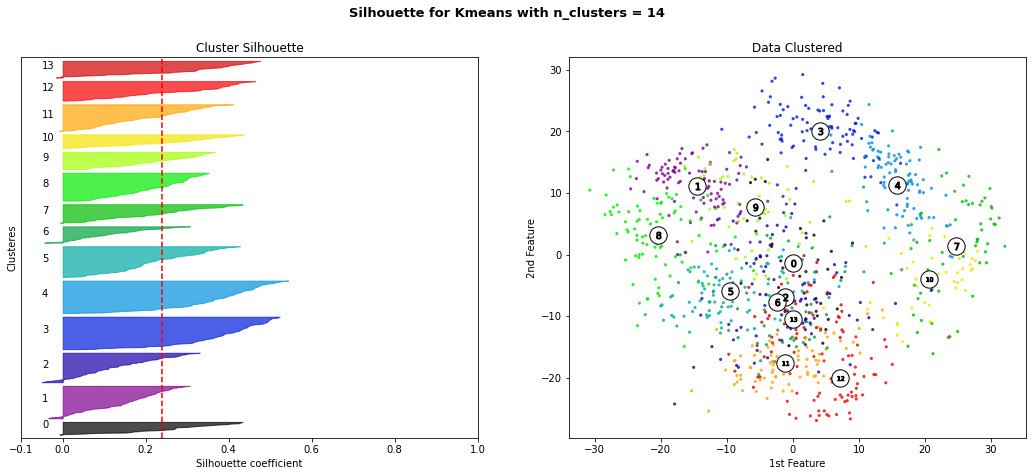

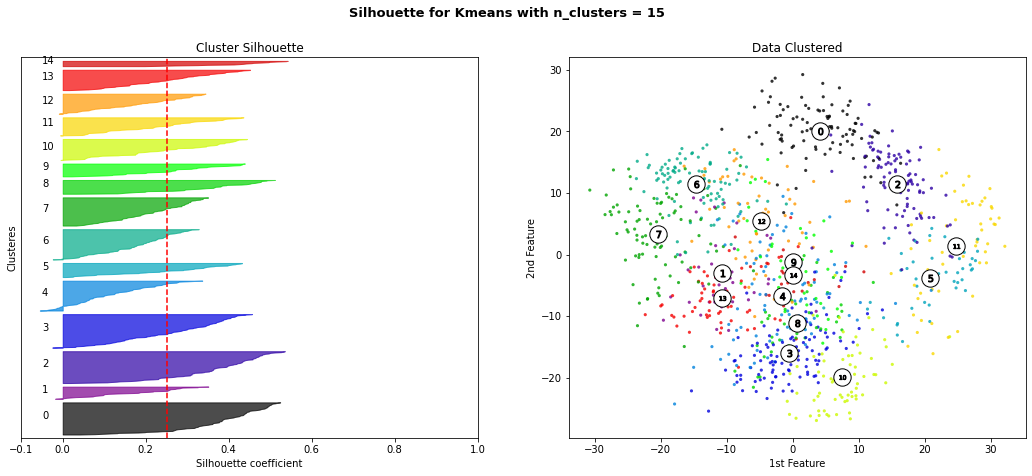

In [4]:

# Define the k range
k_range = list(range(2, 16))

silhouette_vs_k = []
dbs_vs_k = []

for r in k_range:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_ylim([0, len(X) + (r + 1) * 10])

    # Compute the k means clusteres
    clusterer = KMeans(n_clusters=r, random_state=0)
    cluster_predicted = clusterer.fit_predict(X)

    # Compute the silhouette
    silhouette_average = silhouette_score(X, cluster_predicted)
    silhouette_sample = silhouette_samples(X, cluster_predicted)
    silhouette_vs_k.append([r, silhouette_average])
    
    # Compute the davies_bouldin_score
    dbs = davies_bouldin_score(X, cluster_predicted)
    dbs_vs_k.append([r, dbs])
    
    print(f"n_clusters: {r}, average_silhouette_score: {silhouette_average}")
    
    # Plot 
    plt.suptitle("Silhouette for Kmeans with n_clusters = %d" % r, fontsize=13, fontweight="bold")
    plot_silhouette(ax1, r, silhouette_average, silhouette_sample, cluster_predicted)
    plot_cluster(ax2, X, clusterer.cluster_centers_, cm.nipy_spectral(cluster_predicted.astype(float) / r))

plt.show()


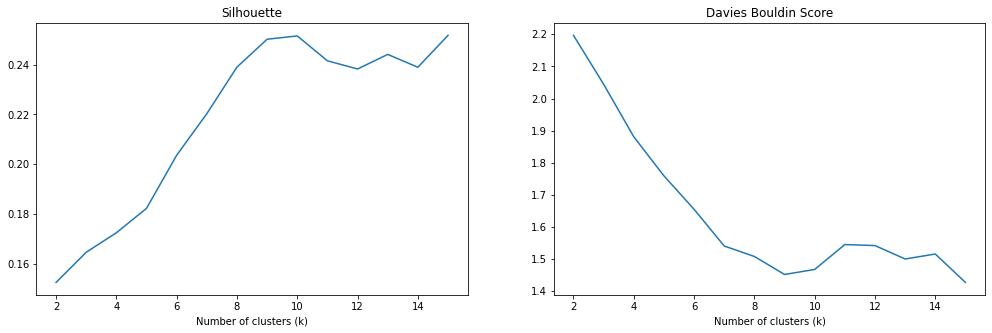

In [20]:
silhouette_vs_k = np.asarray(silhouette_vs_k)
dbs_vs_k = np.asarray(dbs_vs_k)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))
ax1.plot(silhouette_vs_k[:, 0], silhouette_vs_k[:, 1])
ax2.plot(dbs_vs_k[:, 0], dbs_vs_k[:, 1])  

ax1.set_title("Silhouette")
ax2.set_title("Davies Bouldin Score")
ax1.set_xlabel("Number of clusters (k)")
ax2.set_xlabel("Number of clusters (k)")

plt.show()

Considerando o comportamento das curvas de silhueta e Davies Bouldin Score, podemos constatar que os melhores valores para $k$ estão no intervalo de 8 a 11, ou seja, as curvas apresentam respectivamente um pico e um vale. Analisando os gráficos da silueta em comparação com os clusters gerados, podemos restringir o valor ideal entre 10 e 11, devido a homogeneidade das silhuetas geradas.

## 2) GMM

In [21]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=10, random_state=0).fit(X)